In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parallel_kernels=[3,5,7]

for k in range(len(parallel_kernels)):

    conv = Conv2D(128, parallel_kernels[k], padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inp, out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 100, 100, 384)     11008     
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        221248    
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                        

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
55/55 [==============================] - ETA: 0s - loss: 0.4370 - accuracy: 0.8043

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


55/55 [==============================] - 453s 8s/step - loss: 0.4370 - accuracy: 0.8043 - val_loss: 0.1692 - val_accuracy: 0.9585
Epoch 2/20
55/55 [==============================] - ETA: 0s - loss: 0.1848 - accuracy: 0.9446

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


55/55 [==============================] - 419s 8s/step - loss: 0.1848 - accuracy: 0.9446 - val_loss: 0.1457 - val_accuracy: 0.9637
Epoch 3/20
55/55 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0.9550

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


55/55 [==============================] - 421s 8s/step - loss: 0.1387 - accuracy: 0.9550 - val_loss: 0.0867 - val_accuracy: 0.9637
Epoch 4/20
55/55 [==============================] - 404s 7s/step - loss: 0.1023 - accuracy: 0.9648 - val_loss: 0.0874 - val_accuracy: 0.9689
Epoch 5/20
55/55 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9682

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


55/55 [==============================] - 405s 7s/step - loss: 0.0922 - accuracy: 0.9682 - val_loss: 0.0755 - val_accuracy: 0.9689
Epoch 6/20
55/55 [==============================] - 408s 7s/step - loss: 0.1105 - accuracy: 0.9654 - val_loss: 0.1131 - val_accuracy: 0.9637
Epoch 7/20
55/55 [==============================] - 512s 9s/step - loss: 0.0854 - accuracy: 0.9711 - val_loss: 0.0984 - val_accuracy: 0.9585
Epoch 8/20
55/55 [==============================] - 561s 10s/step - loss: 0.0850 - accuracy: 0.9740 - val_loss: 0.0792 - val_accuracy: 0.9741
Epoch 9/20
55/55 [==============================] - 569s 10s/step - loss: 0.0538 - accuracy: 0.9815 - val_loss: 0.0824 - val_accuracy: 0.9741
Epoch 10/20
55/55 [==============================] - 604s 11s/step - loss: 0.1033 - accuracy: 0.9694 - val_loss: 0.0844 - val_accuracy: 0.9637
Epoch 11/20
55/55 [==============================] - 578s 11s/step - loss: 0.0717 - accuracy: 0.9769 - val_loss: 0.1291 - val_accuracy: 0.9741
Epoch 12/20
55/55 

INFO:tensorflow:Assets written to: model-012.model\assets


INFO:tensorflow:Assets written to: model-012.model\assets


55/55 [==============================] - 596s 11s/step - loss: 0.1110 - accuracy: 0.9694 - val_loss: 0.0751 - val_accuracy: 0.9896
Epoch 13/20
55/55 [==============================] - 588s 11s/step - loss: 0.1450 - accuracy: 0.9527 - val_loss: 0.1646 - val_accuracy: 0.9585
Epoch 14/20
55/55 [==============================] - 583s 11s/step - loss: 0.0833 - accuracy: 0.9769 - val_loss: 0.1205 - val_accuracy: 0.9637
Epoch 15/20
55/55 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9815 

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


55/55 [==============================] - 591s 11s/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0588 - val_accuracy: 0.9793
Epoch 16/20
55/55 [==============================] - 432s 8s/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0778 - val_accuracy: 0.9793
Epoch 17/20
55/55 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9873

INFO:tensorflow:Assets written to: model-017.model\assets


INFO:tensorflow:Assets written to: model-017.model\assets


55/55 [==============================] - 1118s 21s/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0514 - val_accuracy: 0.9793
Epoch 18/20
55/55 [==============================] - 391s 7s/step - loss: 0.0248 - accuracy: 0.9936 - val_loss: 0.0654 - val_accuracy: 0.9793
Epoch 19/20
55/55 [==============================] - 390s 7s/step - loss: 0.0260 - accuracy: 0.9896 - val_loss: 0.0712 - val_accuracy: 0.9793
Epoch 20/20
55/55 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9856

INFO:tensorflow:Assets written to: model-020.model\assets


INFO:tensorflow:Assets written to: model-020.model\assets


55/55 [==============================] - 410s 7s/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0267 - val_accuracy: 0.9845


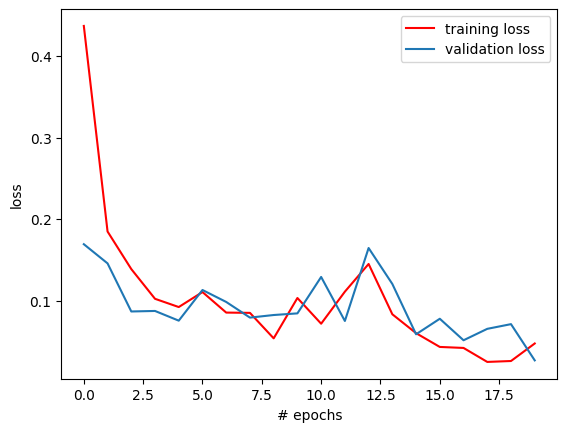

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

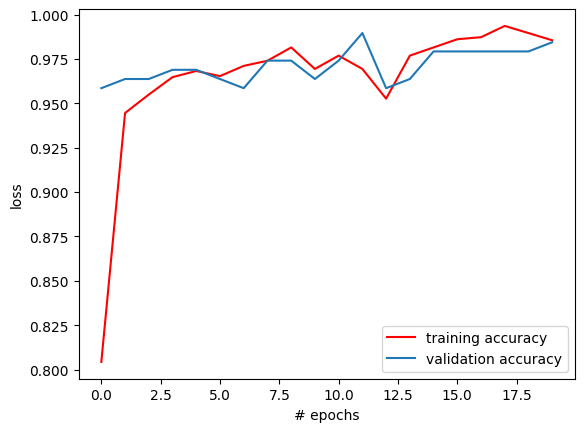

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 13s 2s/step - loss: 0.0252 - accuracy: 0.9907
[0.025194890797138214, 0.9906542301177979]
